In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random

In [78]:
grid_size = 25
obstacle_ratio = 0.2
reward_goal = 100
reward = -1
reward_obstacle = -5
actions = ["up", "down", "left", "right"]

In [79]:
grid = np.zeros((grid_size, grid_size))
num_obstacles = int(grid_size*grid_size*obstacle_ratio)


#Initialize Obstacles
for i in range(num_obstacles):
    x, y = np.random.randint(0, grid_size, size=2)
    grid[x, y] = -1


print("Grid Size:", grid_size, "x", grid_size)
print("Number of Obstacles:", num_obstacles)

Grid Size: 25 x 25
Number of Obstacles: 125


In [80]:
start = (random.randint(0, grid_size-1), random.randint(0, grid_size-1))
goal = (random.randint(0, grid_size-1), random.randint(0, grid_size-1))

while (grid[start] == -1 or grid[goal] == -1 or start == goal):
    start = (random.randint(0, grid_size-1), random.randint(0, grid_size-1))
    goal = (random.randint(0, grid_size-1), random.randint(0, grid_size-1))


grid[start] = 1
grid[goal] = 5

print("Start position:", start)
print("Goal position:", goal)

Start position: (14, 21)
Goal position: (0, 16)


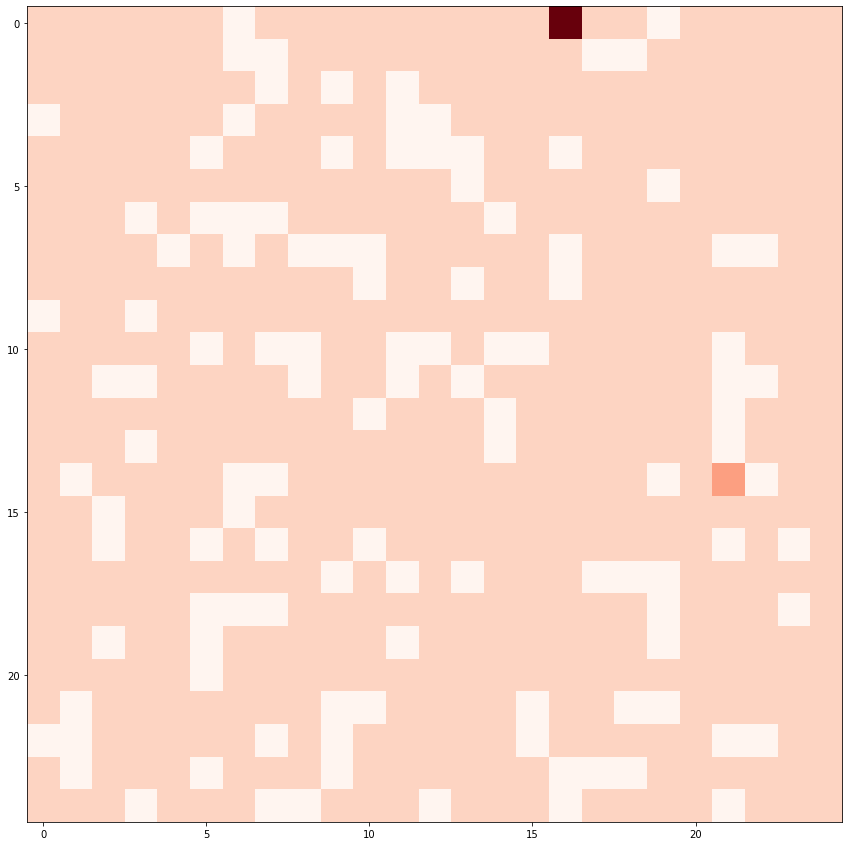

In [81]:
#Show the grid

plt.figure(figsize=(15, 15))
plt.imshow(grid, cmap="Reds")
plt.show()

In [82]:
rewards = np.full((grid_size, grid_size), reward)
rewards[grid == 100] = reward_goal
rewards[grid == -1] = reward_obstacle

In [83]:
def state_action(state, action):
    x, y = state
    if action == "up" and x > 0:
        return (x - 1, y)
    elif action == "down" and x < grid_size - 1:
        return (x + 1, y)
    elif action == "left" and y > 0:
        return (x, y - 1)
    elif action == "right" and y < grid_size - 1:
        return (x, y + 1)
    return state  # No movement if action goes out of bounds

In [ ]:
def value_iteration(rewards, gamma=0.9, threshold=1e-4):
    values = 